# Data Analysis

# Gold Price Data

## About Dataset
Data Overview: This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv(r"C:\Users\dell\Desktop\Data Science & ML\Breast Cancer Classification with Neural Network\gld_price_data.csv")
data. head(11)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [39]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


# Data Vaisulization

<AxesSubplot:>

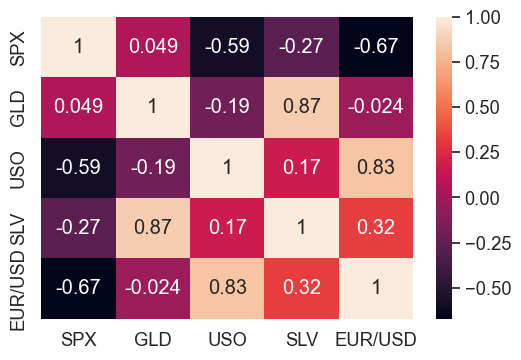

In [6]:
#Data Correlations
fig = plt.figure(dpi = 100)
sns.set(rc={'figure.figsize':[30,15]},font_scale=1.2)
sns.heatmap(data.corr(), annot = True)

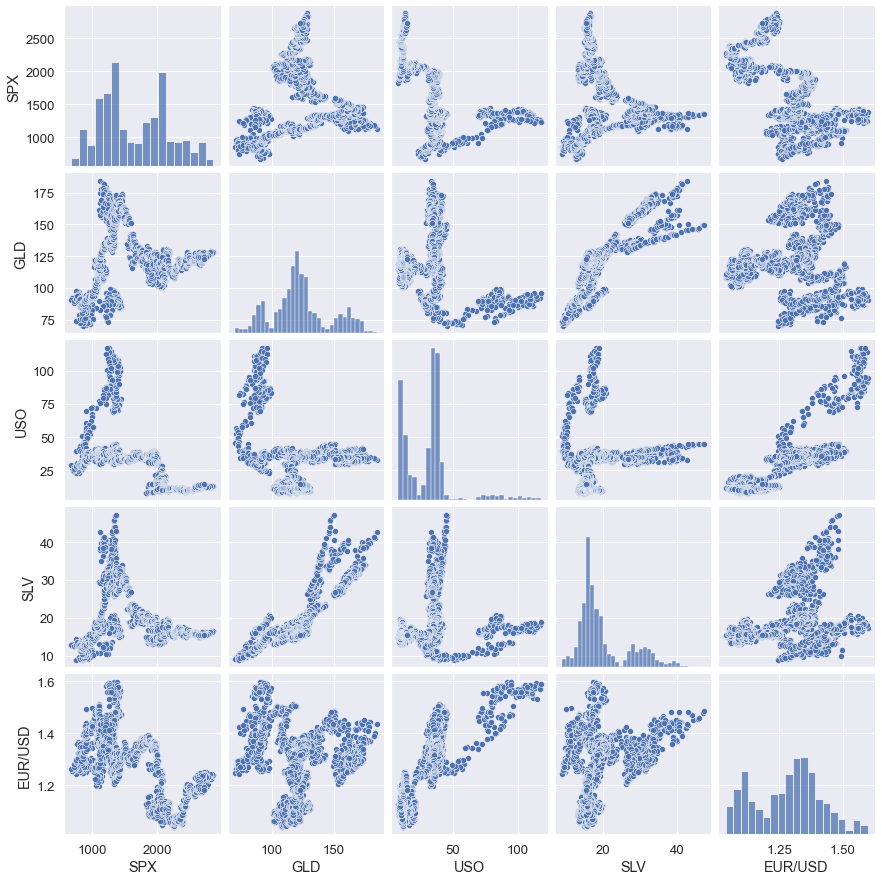

In [7]:
sns.pairplot(data)

## Numiercal Values

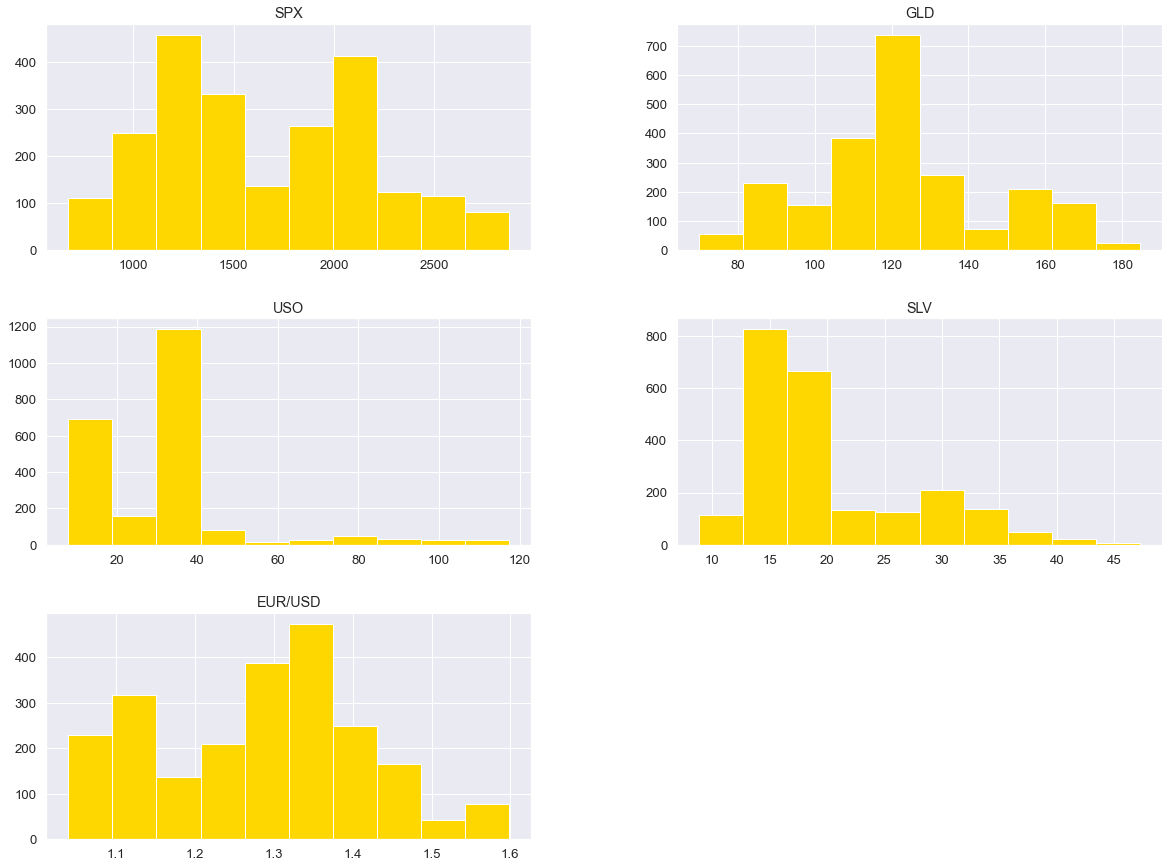

In [13]:
data.hist(figsize=(20,15),color='gold')
plt.show()

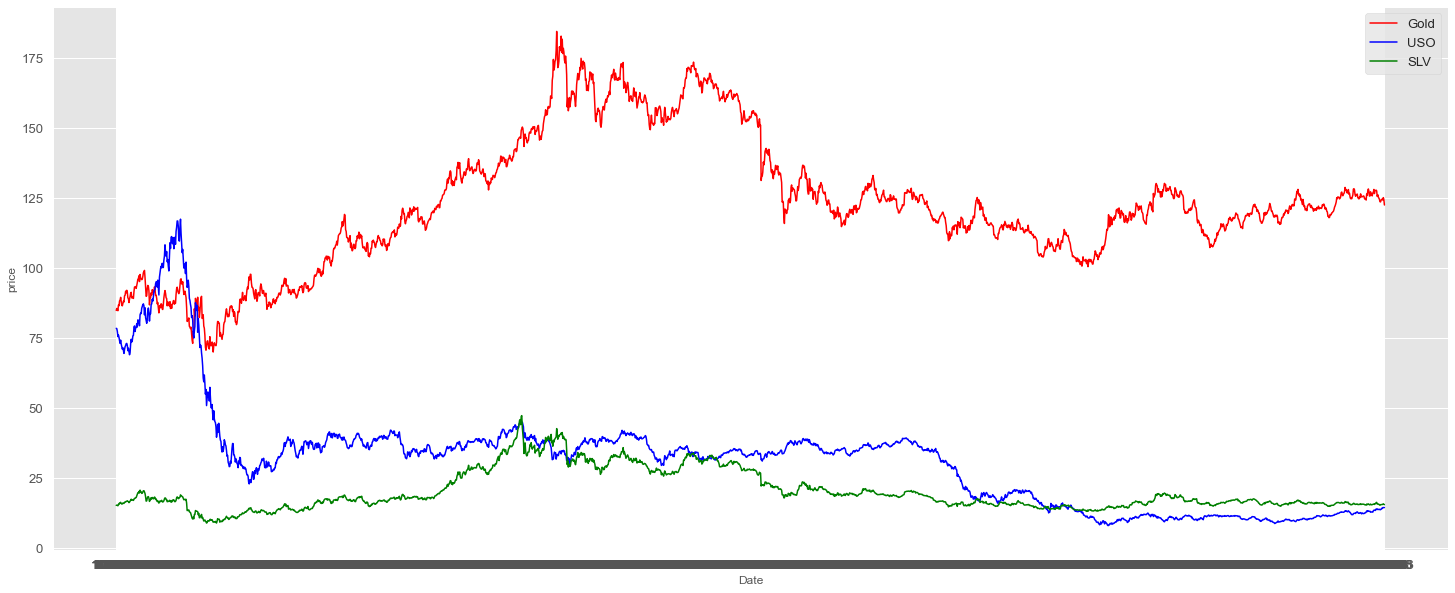

In [18]:
#Time series (line plot)
from matplotlib import style
%matplotlib inline
style.use('ggplot')
plt.figure(figsize=(25,10))
plt.plot(data['Date'].values,data['GLD'],color='red',label='Gold')
plt.plot(data['Date'].values,data['USO'],color='blue',label='USO')
plt.plot(data['Date'].values,data['SLV'],color='green',label='SLV')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

# Data Cleaning 

In [9]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Machine learning

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

In [29]:
X=data.drop(['Date','GLD'],axis=1)
Y=data['GLD']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [37]:
# Model Evaluation prediction on Test Data
y_pred= model.predict(X_test)
y_pred

array([168.81210022,  82.02069982, 115.72690044, 127.70490054,
       120.86140098, 154.84519788, 150.43299906, 126.16349982,
       117.47989884, 125.85860109, 116.407601  , 171.4290007 ,
       141.46569845, 168.02099896, 115.09800003, 117.90940027,
       139.87150347, 169.93070106, 159.21190259, 159.43329904,
       155.17299984, 125.03780021, 176.37339975, 157.30330385,
       125.19720051,  93.82549966,  76.92840034, 120.65829994,
       119.17029947, 167.40799946,  88.07250039, 125.36309981,
        91.29480113, 117.55860042, 121.15539887, 136.16490118,
       115.52390108, 115.28260074, 147.33679975, 107.21650104,
       104.6924023 ,  87.11189785, 126.38010046, 117.83599999,
       152.06489869, 119.54170001, 108.43310004, 108.10259804,
        93.1347002 , 126.96659836,  75.01630055, 113.69639909,
       121.28399994, 111.19579964, 118.72749889, 120.5533995 ,
       159.12310094, 167.73330137, 146.70369658,  85.82169827,
        94.24360015,  86.85389899,  90.58530035, 118.96

In [45]:
from sklearn.metrics import r2_score
from sklearn import metrics
error_score = metrics.r2_score(Y_test,y_pred)
print("R squared(r**2) error : ", error_score)

R squared(r**2) error :  0.98929810128928


## Actual price vs Predicted price

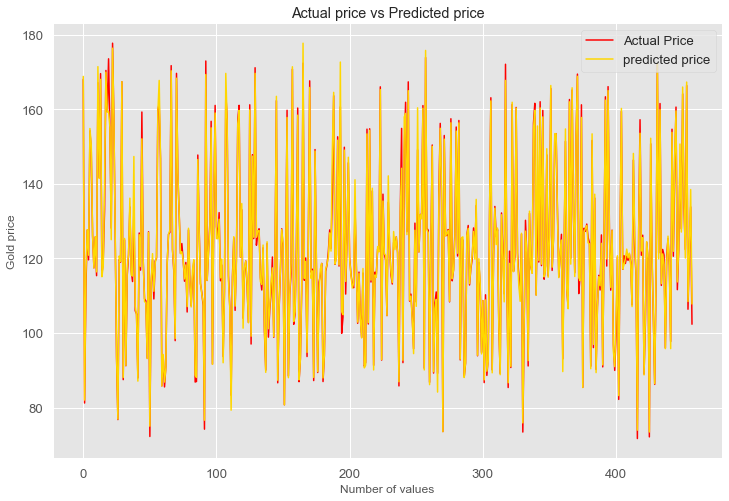

In [51]:
Y_test=list(Y_test)
plt.figure(figsize=(12,8))
plt.plot(Y_test , color='red', label='Actual Price')
plt.plot(y_pred, color='gold', label='predicted price')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()